In [284]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [285]:
%autoreload 2

In [286]:
%matplotlib inline

import dfmaker
import modelmaker
import AnaFunc

reload(dfmaker)
reload(modelmaker)
reload(AnaFunc)

import pandas as pd
import pickle

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#SQL:
from sqlalchemy import create_engine, MetaData, TEXT, Integer, Column, ForeignKey, Float
from sqlalchemy import create_engine
from sqlalchemy import Table as SQLTable
import ConfigParser

## Config / Credential Info:

In [287]:
myconfig = "/Users/ruthtoner/CodingMacros/ProjectInsight/myconfigs.cfg"

## Functions for Making Models:

In [288]:
def DrawStuff(trained_model,trained_vocab,tagged_vocab,result,df_Test,title):
    dict_cuts = AnaFunc.DrawROCandThresh(df_Test,result,title)
    AnaFunc.DrawScatter(df_Test,result,title)
    AnaFunc.DrawBestWords(trained_model,trained_vocab,tagged_vocab,title)
    return dict_cuts

In [289]:
def RegisterToFile(pddf, tag, forest, vect_text, vect_tag, cut_dict, myconfig):

    #Train and double-check model:
    forest_model, forest_vocab1, forest_vocab2 = \
        AnaFunc.Train_Final_Model(tag, forest, vect_text, vect_tag, myconfig)
        
    #Some file information:
    path = "/Users/ruthtoner/CodingMacros/ProjectInsight/Fanguard/files"
    fmname = "sfilter_%s_model.pkl" % tag
    v1name = "sfilter_%s_v1.pkl" % tag
    v2name = "sfilter_%s_v2.pkl" % tag  

    #Data to insert:
    data = {"name":tag,"mf":fmname, \
                "v1f":v1name, "v2f":v2name, \
                "cut60":cut_dict['60p'], "cut80":cut_dict['80p'], "cut90":cut_dict['90p']}

    #Add a new row to mysql frame:
    pddf = pddf.append(data,ignore_index=True)

    #Dump the files:
    with open('%s/%s' % (path,fmname), 'wb') as fid:
        pickle.dump(forest_model, fid)    
    with open('%s/%s' % (path,v1name), 'wb') as fid:
        pickle.dump(forest_vocab1, fid)   
    with open('%s/%s' % (path,v2name), 'wb') as fid:
        pickle.dump(forest_vocab2, fid)              

    return pddf


## Parameters for vocabulary and classifier models:

In [290]:
#Vectorizer:
vect_text = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500, \
                             max_df = 0.8)

vect_tag = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 200, \
                             max_df = 0.8, \
                             binary = True)

    
#Models:

#Gaussian Naive Bayes:
gnb = GaussianNB()

#Random Forest:
forest = RandomForestClassifier(n_estimators = 100)

#Booster:
abc = AdaBoostClassifier(n_estimators = 100)

#SVM:
svc = SVC(kernel='linear',probability=True)

## Table to hold MySQL info:

In [291]:
df_mysql = pd.DataFrame(columns=['name','mf','v1f','v2f','cut60','cut80','cut90'])

# Checking and Training the Models

## Star Wars:

In [292]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("sw", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.680000, FP=0.103935
TP=80p: thresh=0.500000, FP=0.253336
TP=90p: thresh=0.340000, FP=0.445058


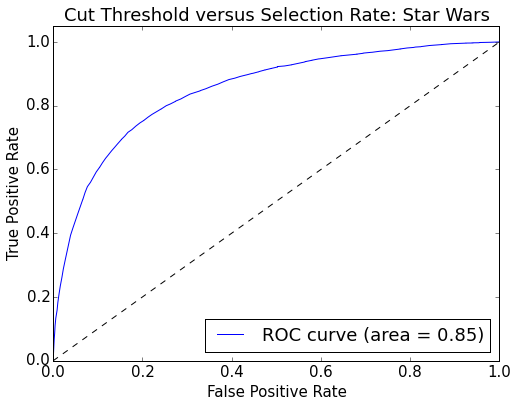

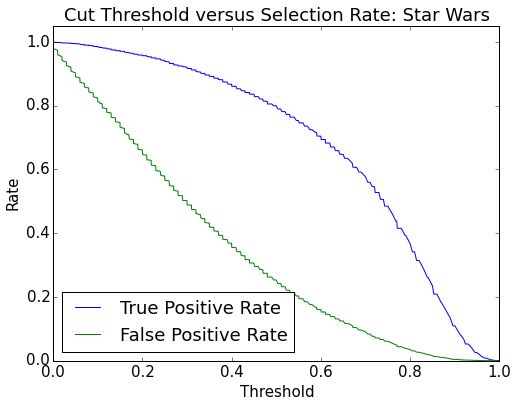

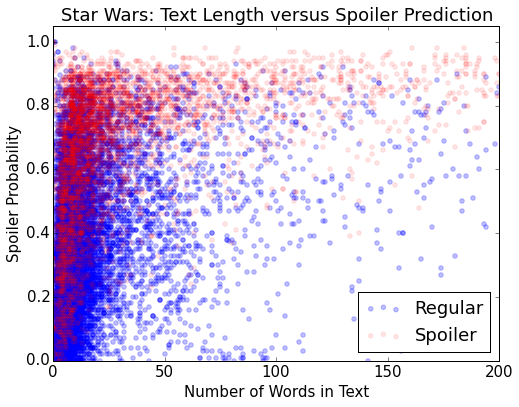

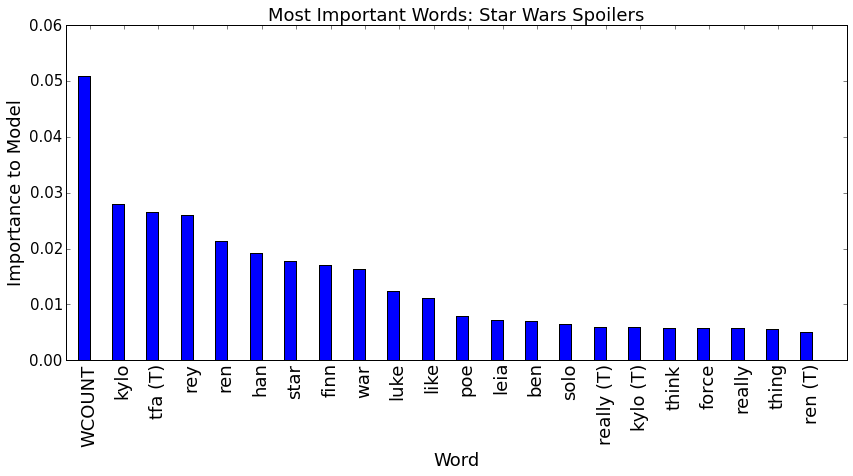

In [293]:
dict_cuts_sw = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Star Wars")

In [294]:
df_mysql = RegisterToFile(df_mysql,"sw", forest, vect_text, vect_tag, dict_cuts_sw, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.846262, Std = 0.000082
Training final model:


## Dragon Age Inquisition:

In [295]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("dai", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.610000, FP=0.160446
TP=80p: thresh=0.447500, FP=0.339265
TP=90p: thresh=0.320000, FP=0.541667


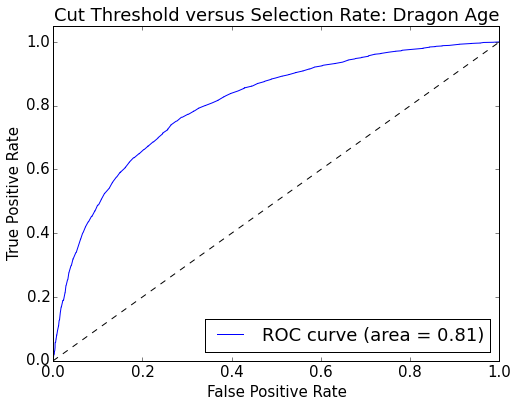

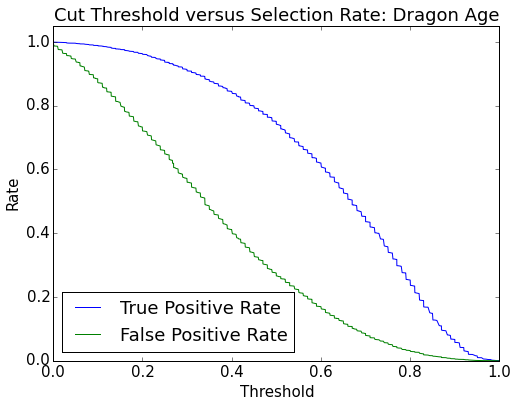

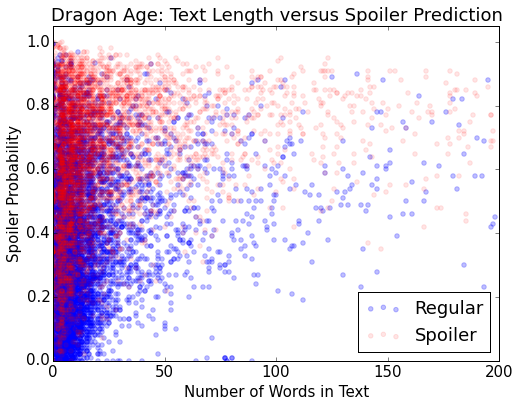

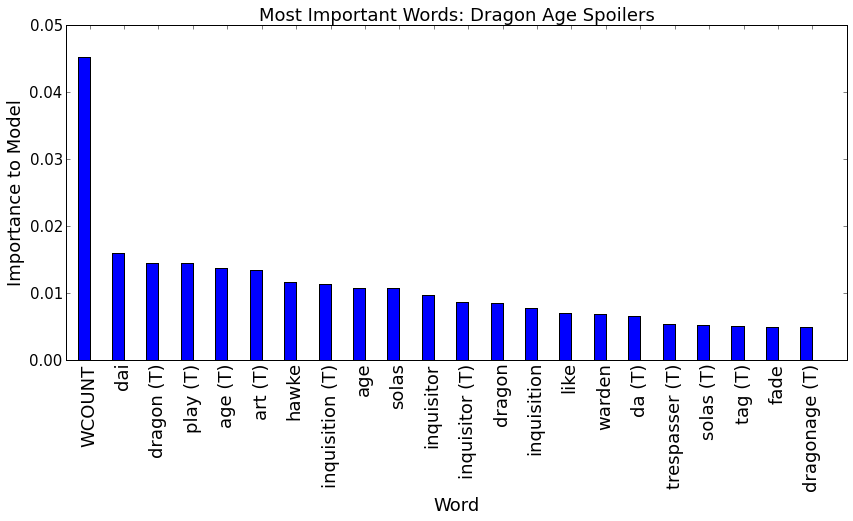

In [296]:
dict_cuts_dai = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Dragon Age")

In [297]:
df_mysql = RegisterToFile(df_mysql,"dai", forest, vect_text, vect_tag, dict_cuts_dai, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.798342, Std = 0.001498
Training final model:


## Age of Ultron

In [298]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("aou", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.680000, FP=0.101736
TP=80p: thresh=0.500000, FP=0.252849
TP=90p: thresh=0.340000, FP=0.424851


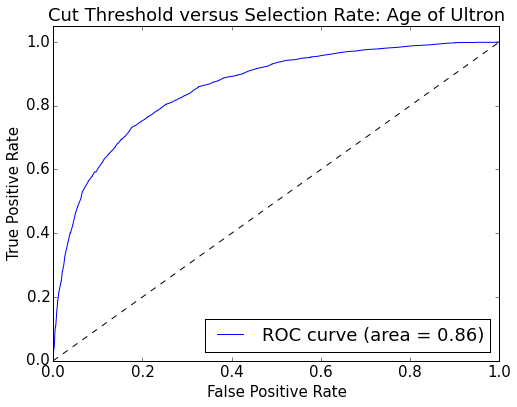

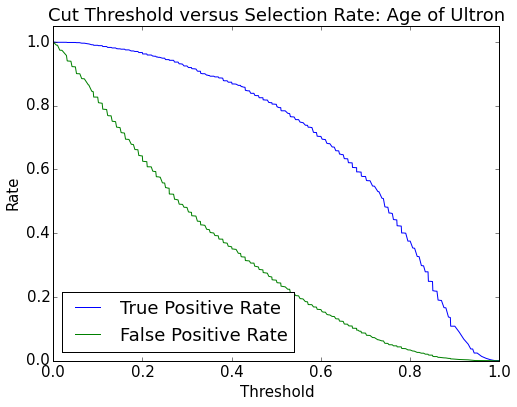

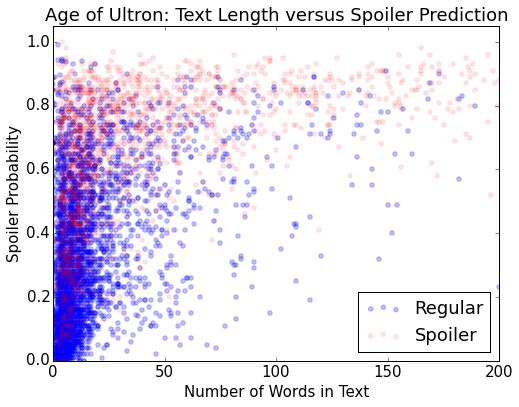

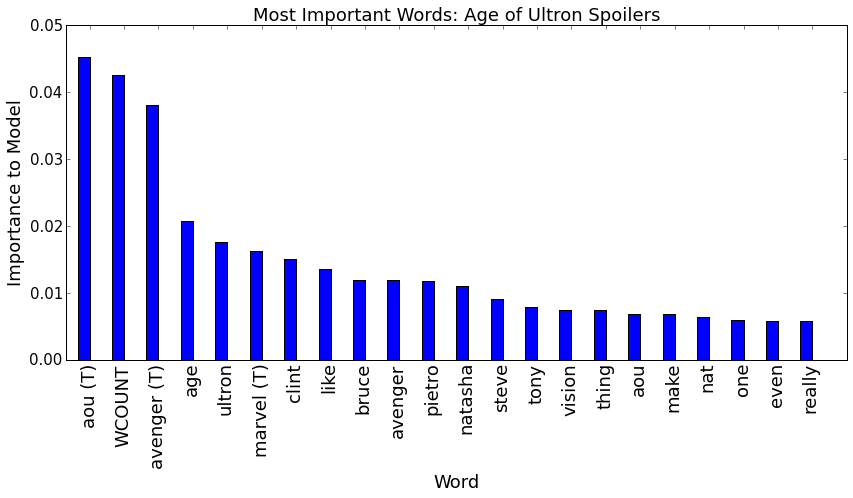

In [299]:
dict_cuts_aou = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Age of Ultron")

In [300]:
df_mysql = RegisterToFile(df_mysql,"aou", forest, vect_text, vect_tag, dict_cuts_aou, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.858953, Std = 0.006565
Training final model:


## Mad Max Fury Road

In [301]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("madmax", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.600000, FP=0.127530
TP=80p: thresh=0.440000, FP=0.273279
TP=90p: thresh=0.300000, FP=0.447368


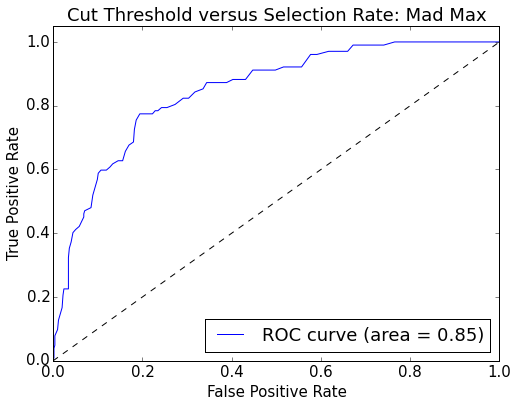

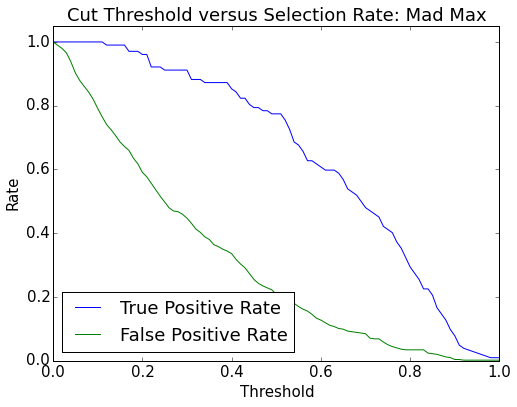

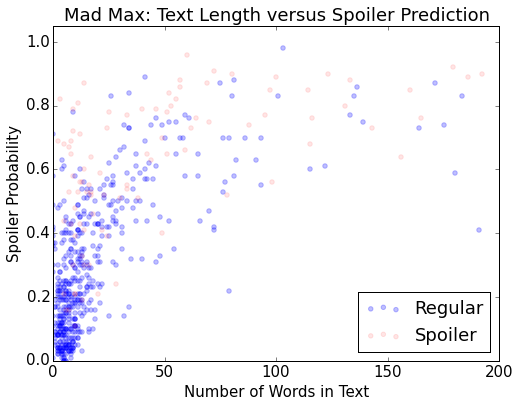

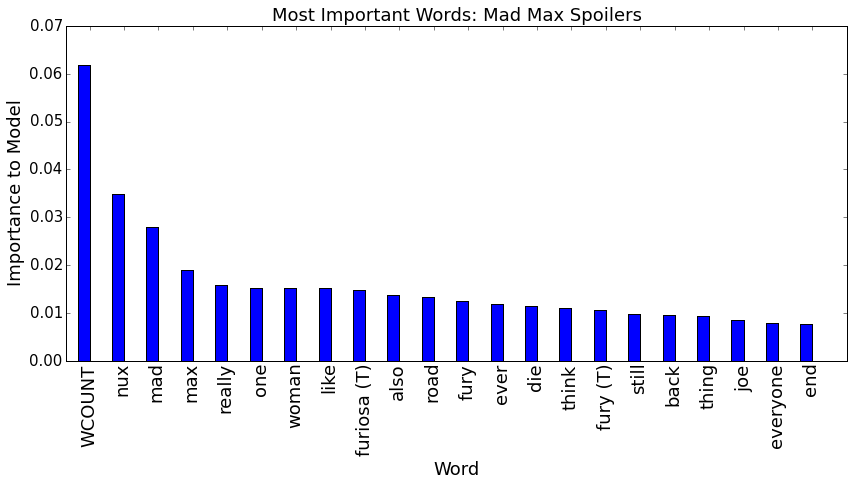

In [302]:
dict_cuts_madmax = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Mad Max")

In [303]:
df_mysql = RegisterToFile(df_mysql,"madmax", forest, vect_text, vect_tag, dict_cuts_madmax, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.834990, Std = 0.008566
Training final model:


## Undertale

In [304]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("utale", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.611487, FP=0.171331
TP=80p: thresh=0.440000, FP=0.362051
TP=90p: thresh=0.306667, FP=0.555691


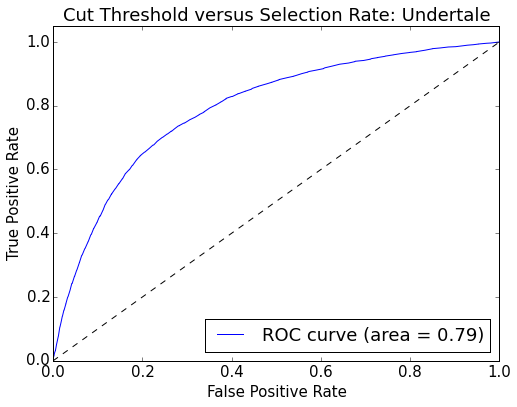

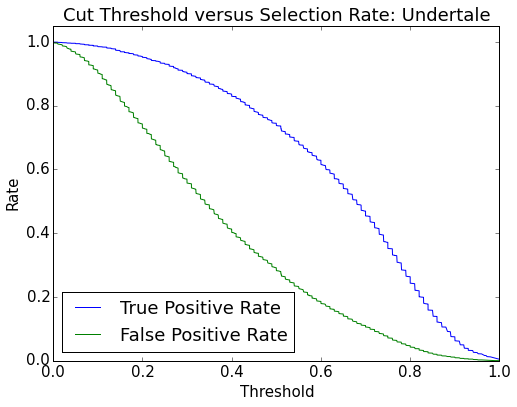

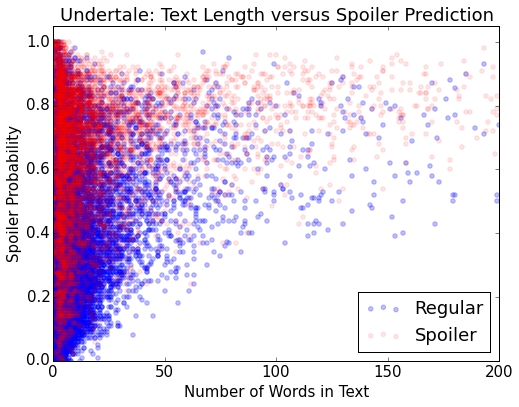

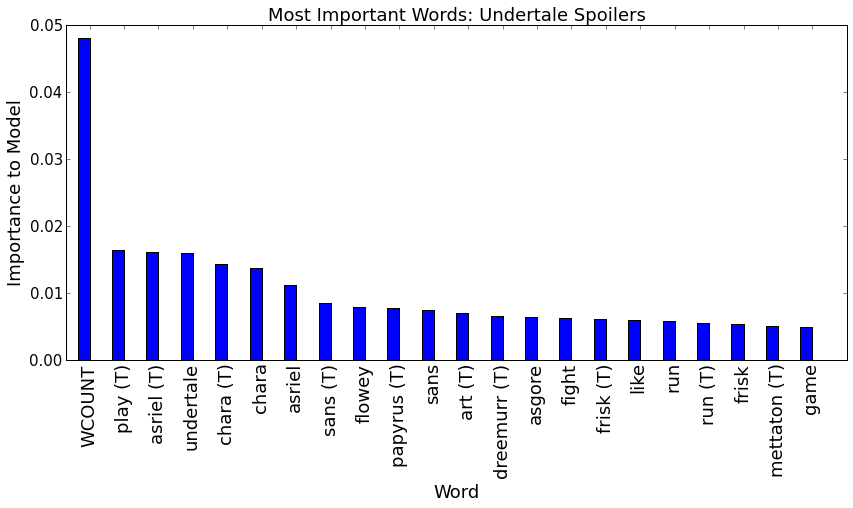

In [305]:
dict_cuts_utale = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Undertale")

In [306]:
df_mysql = RegisterToFile(df_mysql,"utale", forest, vect_text, vect_tag, dict_cuts_utale, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.786762, Std = 0.002795
Training final model:


## Sherlock

In [307]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("slock", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.570000, FP=0.259098
TP=80p: thresh=0.416452, FP=0.472543
TP=90p: thresh=0.310000, FP=0.647091


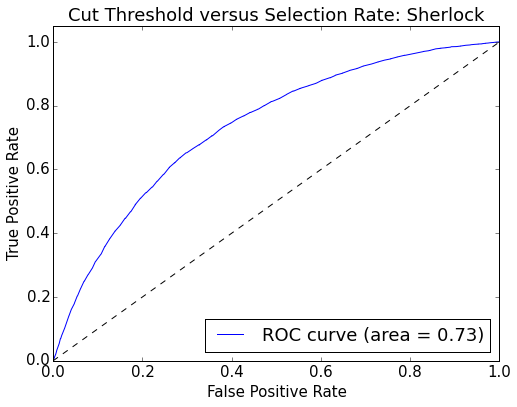

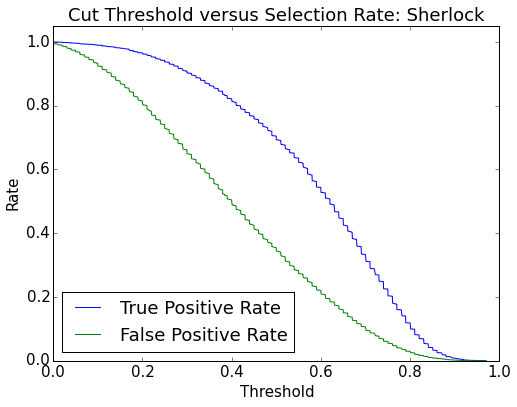

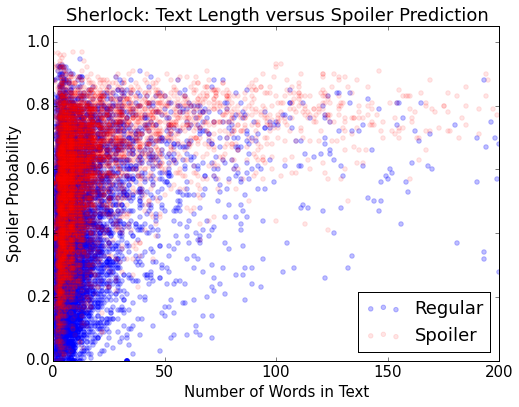

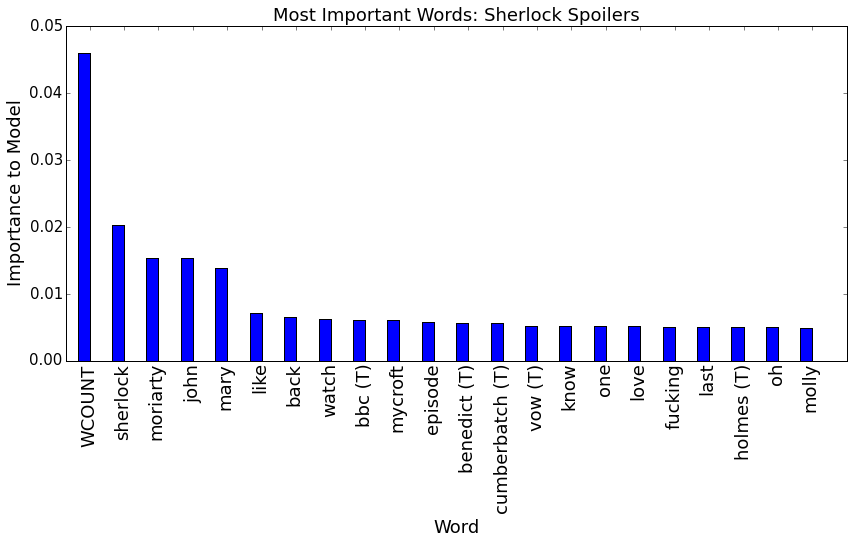

In [308]:
dict_cuts_slock = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Sherlock")

In [309]:
df_mysql = RegisterToFile(df_mysql,"slock", forest, vect_text, vect_tag, dict_cuts_slock, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.731902, Std = 0.003018
Training final model:


## Life is Strange

In [310]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("lis", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.590000, FP=0.184647
TP=80p: thresh=0.410000, FP=0.418880
TP=90p: thresh=0.280000, FP=0.623029


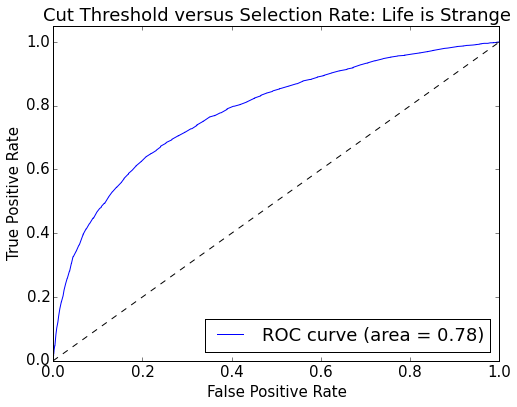

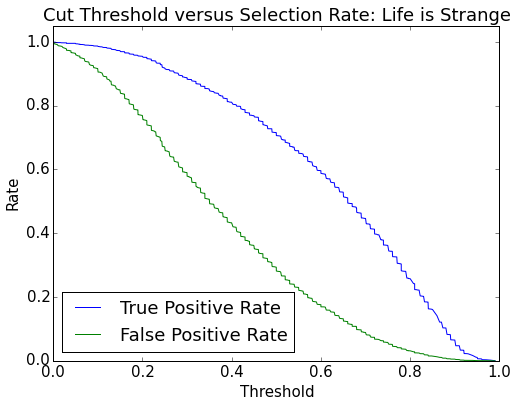

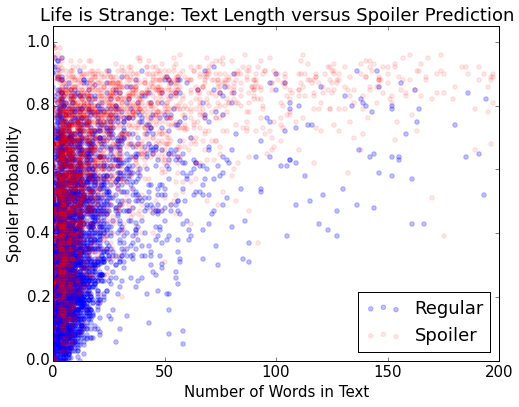

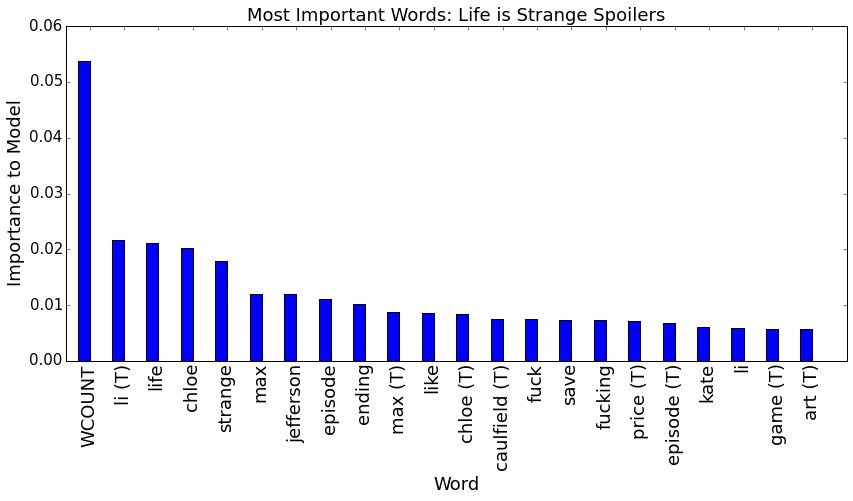

In [311]:
dict_cuts_lis = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Life is Strange")

In [312]:
df_mysql = RegisterToFile(df_mysql,"lis", forest, vect_text, vect_tag, dict_cuts_lis, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.785896, Std = 0.005868
Training final model:


## Game of Thrones

In [313]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("got", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.600000, FP=0.213558
TP=80p: thresh=0.430000, FP=0.417784
TP=90p: thresh=0.310000, FP=0.599914


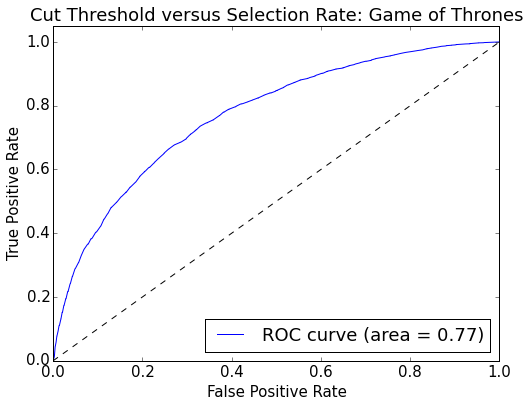

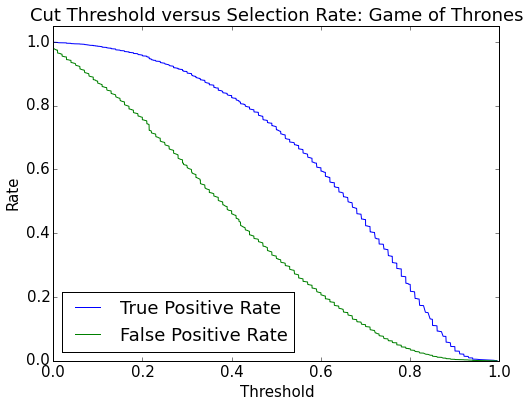

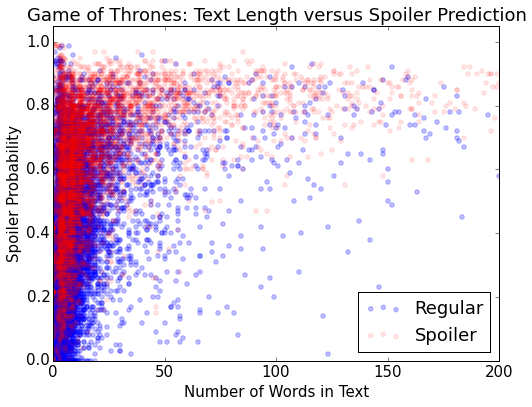

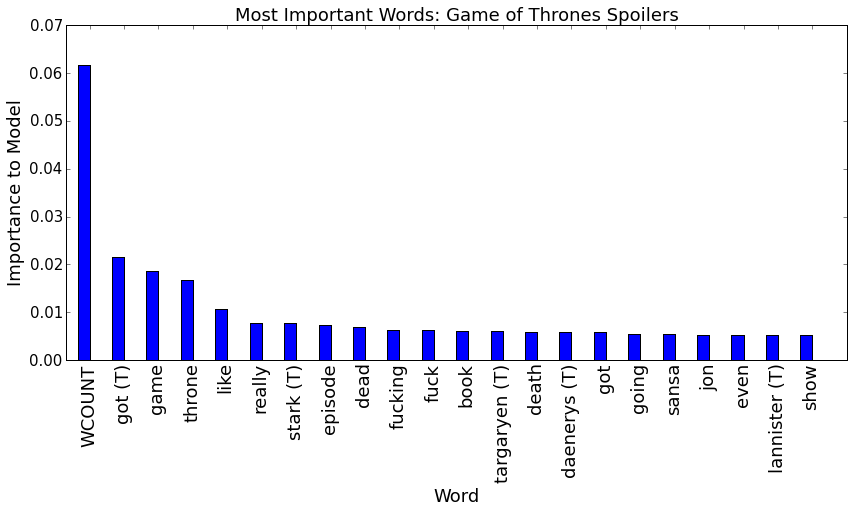

In [314]:
dict_cuts_got = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Game of Thrones")

In [315]:
df_mysql = RegisterToFile(df_mysql,"got", forest, vect_text, vect_tag, dict_cuts_got, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.765766, Std = 0.000148
Training final model:


## Hannibal

In [316]:
forest_model, forest_vocab1, forest_vocab2, forest_result, df_test = \
    AnaFunc.Train_A_Model("han", forest, vect_text, vect_tag, myconfig)

TP=60p: thresh=0.540000, FP=0.314647
TP=80p: thresh=0.406643, FP=0.531419
TP=90p: thresh=0.306667, FP=0.703619


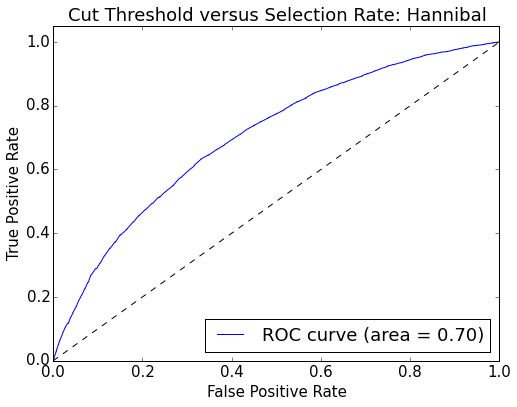

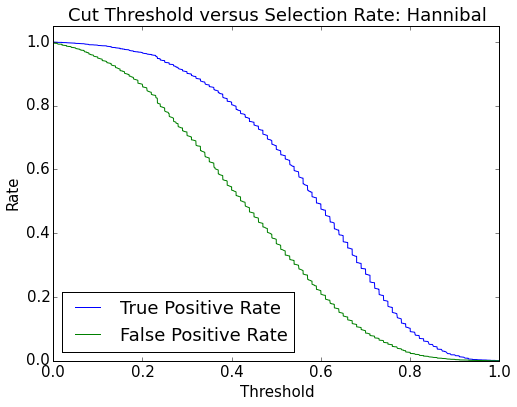

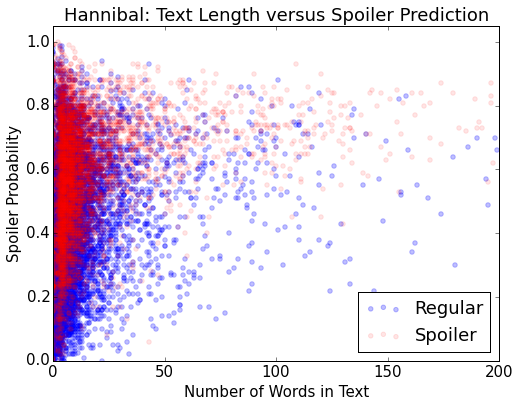

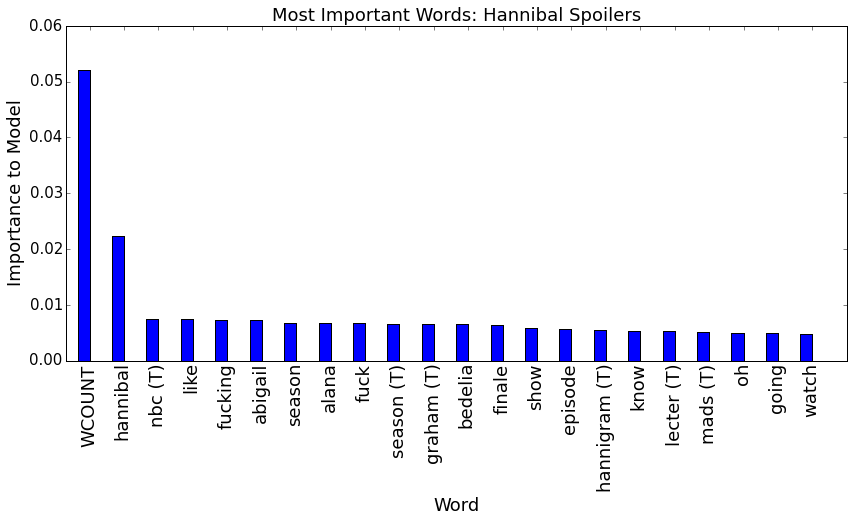

In [317]:
dict_cuts_han = DrawStuff(forest_model, forest_vocab1, forest_vocab2, forest_result, df_test,"Hannibal")

In [318]:
df_mysql = RegisterToFile(df_mysql,"han", forest, vect_text, vect_tag, dict_cuts_han, myconfig)

Checking CV (nfold=2):
Mean AUC = 0.695080, Std = 0.001423
Training final model:


# Write the Model Metadata to File

In [247]:
df_mysql = df_mysql.set_index('name')

In [248]:
df_mysql

,mf,v1f,v2f,cut60,cut80,cut90
name,,,,,,
sw,sfilter_sw_model.pkl,sfilter_sw_v1.pkl,sfilter_sw_v2.pkl,0.700000,0.510000,0.350000
dai,sfilter_dai_model.pkl,sfilter_dai_v1.pkl,sfilter_dai_v2.pkl,0.620000,0.451049,0.328167
aou,sfilter_aou_model.pkl,sfilter_aou_v1.pkl,sfilter_aou_v2.pkl,0.710000,0.520000,0.360000
madmax,sfilter_madmax_model.pkl,sfilter_madmax_v1.pkl,sfilter_madmax_v2.pkl,0.625000,0.437333,0.320000
utale,sfilter_utale_model.pkl,sfilter_utale_v1.pkl,sfilter_utale_v2.pkl,0.630000,0.440000,0.300000
slock,sfilter_slock_model.pkl,sfilter_slock_v1.pkl,sfilter_slock_v2.pkl,0.580000,0.430000,0.320000
lis,sfilter_lis_model.pkl,sfilter_lis_v1.pkl,sfilter_lis_v2.pkl,0.610000,0.430000,0.300000
got,sfilter_got_model.pkl,sfilter_got_v1.pkl,sfilter_got_v2.pkl,0.605363,0.440000,0.320000
han,sfilter_han_model.pkl,sfilter_han_v1.pkl,sfilter_han_v2.pkl,0.550000,0.417486,0.314826


In [253]:
#Get configs:
config = ConfigParser.RawConfigParser()
config.read(myconfig) 

#MySQL info:
db_username = config.get('DB', 'username')
db_pwd = config.get('DB', 'pwd')

#Engine for Mysql
engine = create_engine("mysql+mysqldb://%s:%s@localhost/InsightPaths" % (db_username,db_pwd))

In [265]:
df_mysql = df_mysql.reset_index()

In [266]:
df_mysql.to_sql(name='sfilterMeta', con=engine, if_exists = 'replace', index=False)

In [261]:
#Upload Spoiler Filter Data to MySQL:
meta = MetaData(bind=engine)
table_name = "sfilterMeta"
#Table defs:
sfilterMeta = SQLTable(table_name, meta,
    Column('mf', TEXT, nullable=False), \
    Column('v1f', TEXT, nullable=False), \
    Column('v1f', TEXT, nullable=False), \
    Column('cut60', Float, nullable=False), \
    Column('cut80', Float, nullable=False), \
    Column('cut90', Float, nullable=False)
)
print "Done..."   
meta.create_all(engine)
df_mysql.to_sql(sfilterMeta,engine,flavor='mysql', \
                if_exists='replace',index=True)

Done...


AttributeError: 'Table' object has no attribute 'replace'